# Predicting Netflix’s Next Hit:
# Data-Driven Insights for Optimizing Netflix’s Content Strategy




**Business Objective:**

Business problem: Netflix faces rising competition in the streaming market and high content production costs.

**Our objective:** Use data analytics to predict which types of content drive engagement and subscriber growth — identify which genres, formats, and audience segments yield the highest engagement.

In [13]:
from google.colab import files
import pandas as pd
import io

# Upload the file
uploaded = files.upload()  # choose the CSV file when prompted

# Get the actual filename (handles Colab renaming automatically)
filename = list(uploaded.keys())[0]

# Load into pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# --- Fix date_added and extract year ---
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year


# Quick check
df.head()




Saving netflix_movies_detailed_up_to_2025.csv to netflix_movies_detailed_up_to_2025.csv


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue,year_added
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867,2010
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630,2010
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868,2010
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000,592461732,2010
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000,494879471,2010


In [14]:
df.info()
display(df.describe())
display(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       16000 non-null  int64         
 1   type          16000 non-null  object        
 2   title         16000 non-null  object        
 3   director      15868 non-null  object        
 4   cast          15796 non-null  object        
 5   country       15534 non-null  object        
 6   date_added    16000 non-null  datetime64[ns]
 7   release_year  16000 non-null  int64         
 8   rating        16000 non-null  float64       
 9   duration      0 non-null      float64       
 10  genres        15893 non-null  object        
 11  language      16000 non-null  object        
 12  description   15868 non-null  object        
 13  popularity    16000 non-null  float64       
 14  vote_count    16000 non-null  int64         
 15  vote_average  16000 non-null  float6

,show_id,date_added,release_year,rating,duration,popularity,vote_count,vote_average,budget,revenue,year_added
count,1.600000e+04,16000,16000.000000,16000.000000,0.0,16000.000000,16000.000000,16000.000000,1.600000e+04,1.600000e+04,16000.000000
mean,5.266582e+05,2018-01-04 21:54:37.799999744,2017.500000,5.956368,NaN,20.384728,718.656125,5.956368,8.766792e+06,2.446308e+07,2017.500000
min,1.890000e+02,2010-01-01 00:00:00,2010.000000,0.000000,NaN,3.860000,0.000000,0.000000,0.000000e+00,0.000000e+00,2010.000000
25%,2.257258e+05,2013-12-31 18:00:00,2013.750000,5.600000,NaN,7.840750,53.000000,5.600000,0.000000e+00,0.000000e+00,2013.750000
50%,4.468170e+05,2017-12-31 12:00:00,2017.500000,6.300000,NaN,10.913500,138.000000,6.300000,0.000000e+00,0.000000e+00,2017.500000
75%,7.739808e+05,2021-12-31 06:00:00,2021.250000,6.923000,NaN,17.336500,422.000000,6.923000,2.200000e+06,1.654473e+06,2021.250000
max,1.440471e+06,2025-12-25 00:00:00,2025.000000,10.000000,NaN,3876.006000,37119.000000,10.000000,4.600000e+08,2.799439e+09,2025.000000
std,3.794427e+05,NaN,4.609916,1.754741,NaN,68.610033,2080.198316,1.754741,2.912450e+07,1.116977e+08,4.609916


,0
show_id,0
type,0
title,0
director,132
cast,204
country,466
date_added,0
release_year,0
rating,0
duration,16000


Pre-EDA

In [15]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Summary of numeric columns
print("Numeric Columns Summary:")
print(df[numeric_cols].describe())

print("\nCategorical Columns Summary:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")  # number of unique categories
    print(df[col].value_counts(dropna=False).head(5))    # top 5 most frequent values
    print("-"*40)



Numeric Columns Summary:
            show_id  release_year        rating  duration    popularity  \
count  1.600000e+04  16000.000000  16000.000000       0.0  16000.000000   
mean   5.266582e+05   2017.500000      5.956368       NaN     20.384728   
std    3.794427e+05      4.609916      1.754741       NaN     68.610033   
min    1.890000e+02   2010.000000      0.000000       NaN      3.860000   
25%    2.257258e+05   2013.750000      5.600000       NaN      7.840750   
50%    4.468170e+05   2017.500000      6.300000       NaN     10.913500   
75%    7.739808e+05   2021.250000      6.923000       NaN     17.336500   
max    1.440471e+06   2025.000000     10.000000       NaN   3876.006000   

         vote_count  vote_average        budget       revenue  
count  16000.000000  16000.000000  1.600000e+04  1.600000e+04  
mean     718.656125      5.956368  8.766792e+06  2.446308e+07  
std     2080.198316      1.754741  2.912450e+07  1.116977e+08  
min        0.000000      0.000000  0.000000

# EDA

Inspect datasets

In [16]:
# Check the first few rows
df.head()

# Check column names and data types
df.info()

# Summary statistics for numeric columns
df.describe()

# Check for missing values
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       16000 non-null  int64         
 1   type          16000 non-null  object        
 2   title         16000 non-null  object        
 3   director      15868 non-null  object        
 4   cast          15796 non-null  object        
 5   country       15534 non-null  object        
 6   date_added    16000 non-null  datetime64[ns]
 7   release_year  16000 non-null  int64         
 8   rating        16000 non-null  float64       
 9   duration      0 non-null      float64       
 10  genres        15893 non-null  object        
 11  language      16000 non-null  object        
 12  description   15868 non-null  object        
 13  popularity    16000 non-null  float64       
 14  vote_count    16000 non-null  int64         
 15  vote_average  16000 non-null  float6

,0
show_id,0
type,0
title,0
director,132
cast,204
country,466
date_added,0
release_year,0
rating,0
duration,16000


Distribution of Key Columns

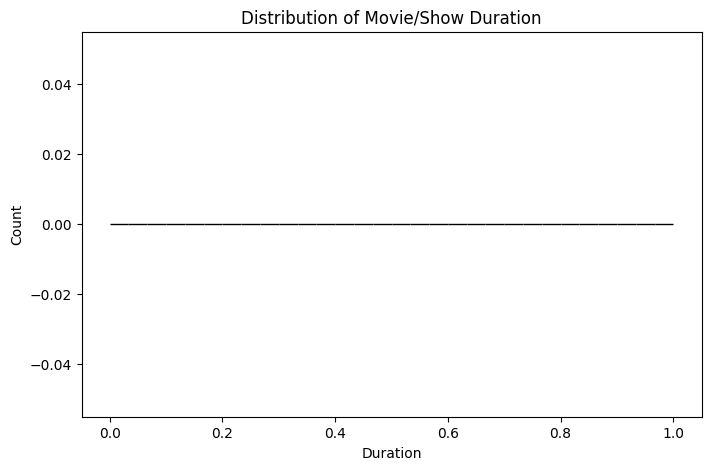

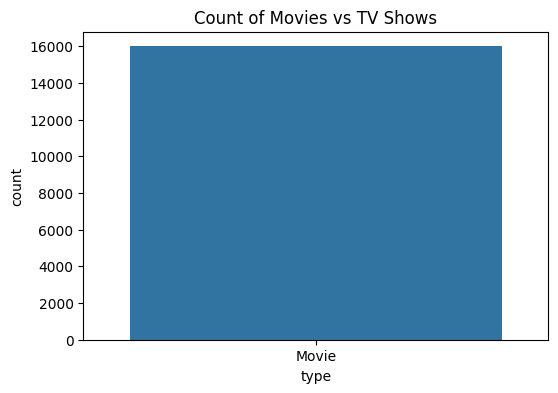

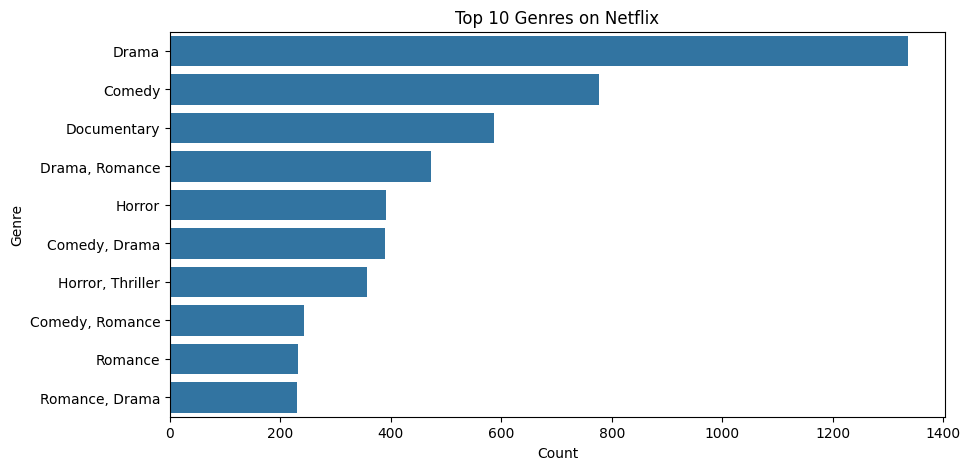

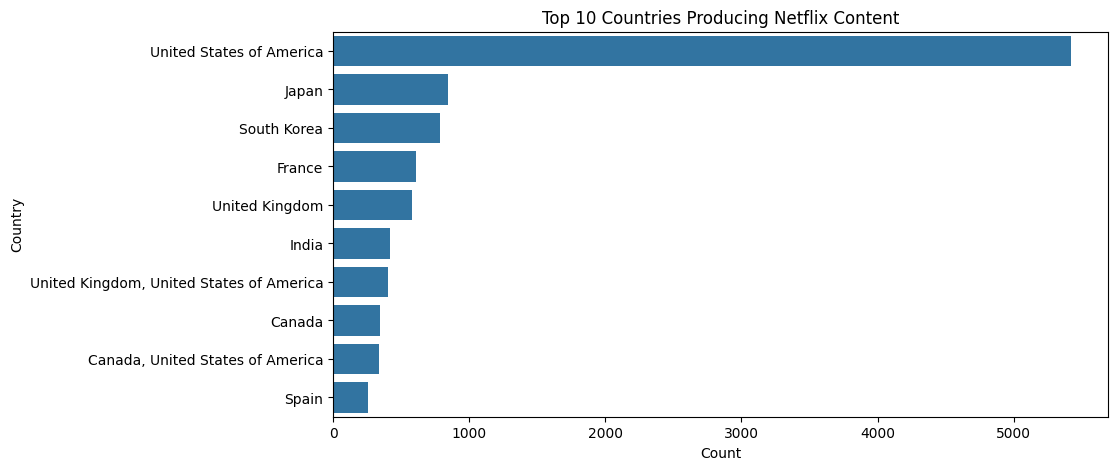

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- Numeric Column: Duration ----------
plt.figure(figsize=(8,5))
sns.histplot(df['duration'], bins=30, kde=True)
plt.title('Distribution of Movie/Show Duration')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

# ---------- Categorical Column: Type ----------
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df)
plt.title('Count of Movies vs TV Shows')
plt.show()

# ---------- Top 10 Genres ----------
top_genres = df['genres'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# ---------- Top 10 Countries ----------
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


**Note:** Duration is comepletely missing. Column has been dropped.

Top Categories

/tmp/ipython-input-1074623406.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


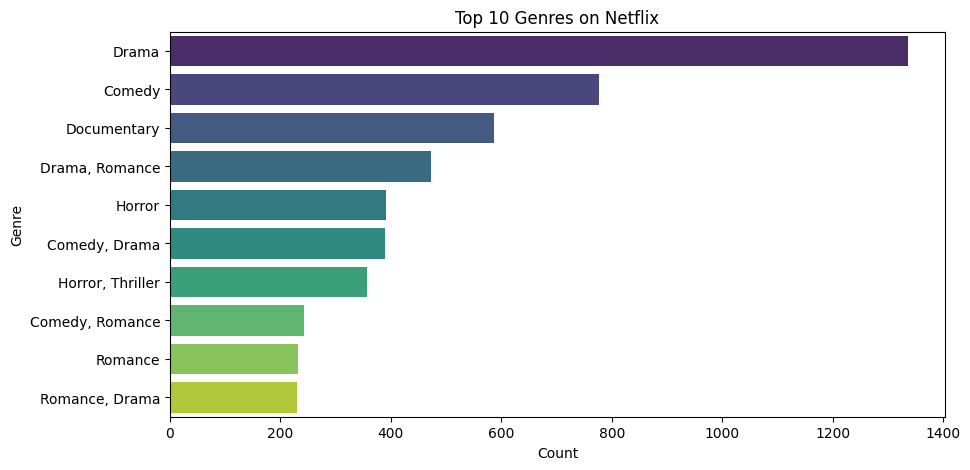

/tmp/ipython-input-1074623406.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="magma")


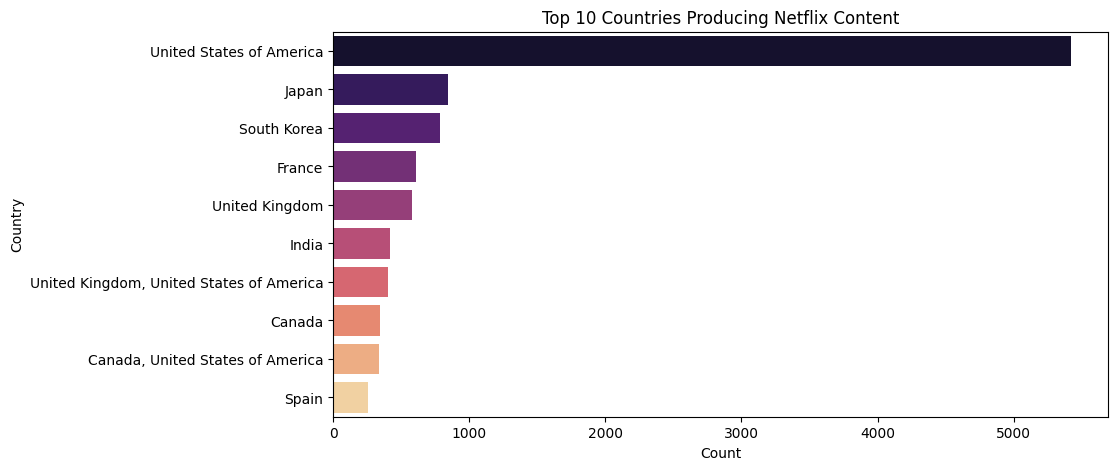

/tmp/ipython-input-1074623406.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="coolwarm")


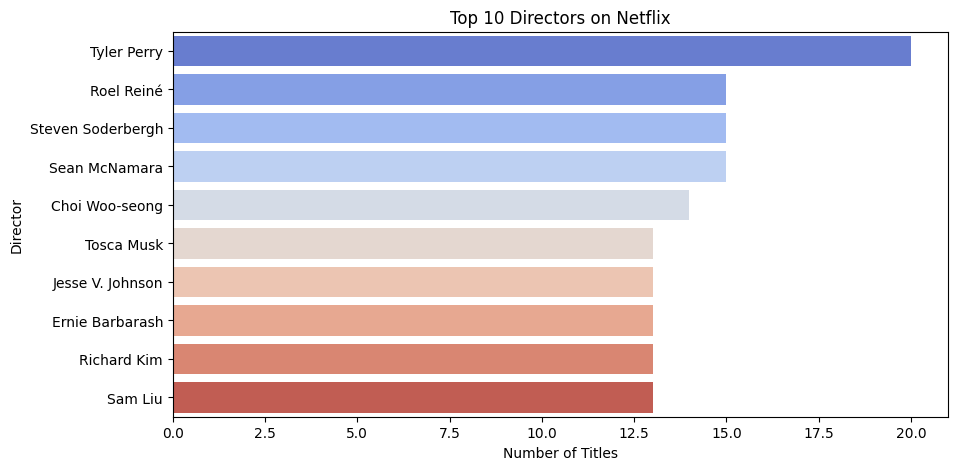

/tmp/ipython-input-1074623406.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_languages.values, y=top_languages.index, palette="plasma")


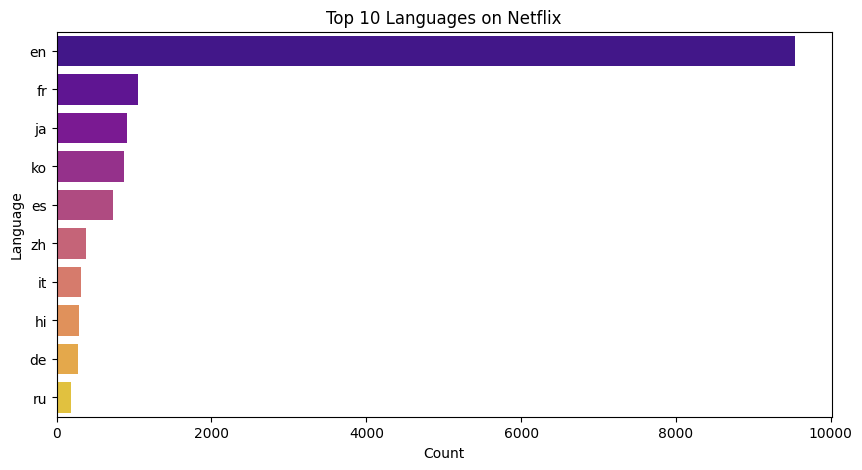

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- Top 10 Genres ----------
top_genres = df['genres'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# ---------- Top 10 Countries ----------
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="magma")
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

# ---------- Top 10 Directors ----------
top_directors = df['director'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="coolwarm")
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

# ---------- Top 10 Languages ----------
top_languages = df['language'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_languages.values, y=top_languages.index, palette="plasma")
plt.title('Top 10 Languages on Netflix')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()


Check missing values

Missing values per column:

show_id             0
type                0
title               0
director          132
cast              204
country           466
date_added          0
release_year        0
rating              0
duration        16000
genres            107
language            0
description       132
popularity          0
vote_count          0
vote_average        0
budget              0
revenue             0
year_added          0
dtype: int64

Percentage of missing values per column:

show_id           0.00000
type              0.00000
title             0.00000
director          0.82500
cast              1.27500
country           2.91250
date_added        0.00000
release_year      0.00000
rating            0.00000
duration        100.00000
genres            0.66875
language          0.00000
description       0.82500
popularity        0.00000
vote_count        0.00000
vote_average      0.00000
budget            0.00000
revenue           0.00000
year_added        0.00000
dtyp

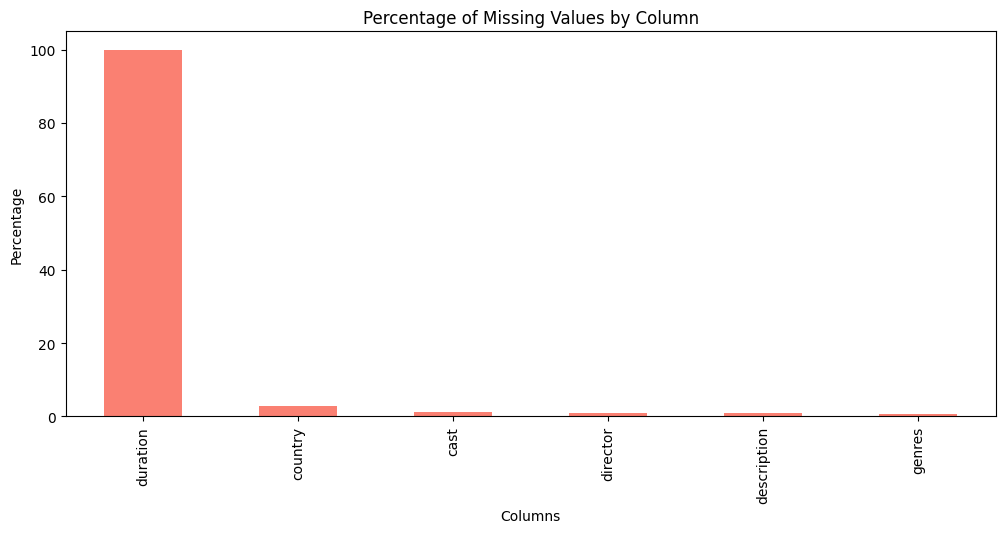

In [19]:
import matplotlib.pyplot as plt

# ---------- Count of missing values per column ----------
missing_counts = df.isnull().sum()
print("Missing values per column:\n")
print(missing_counts)

# ---------- Percentage of missing values per column ----------
missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values per column:\n")
print(missing_percent)

# ---------- Bar chart of missing percentages ----------
plt.figure(figsize=(12,5))
missing_percent[missing_percent > 0].sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.show()




Ratings Analysis

/tmp/ipython-input-3288185358.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='viridis')


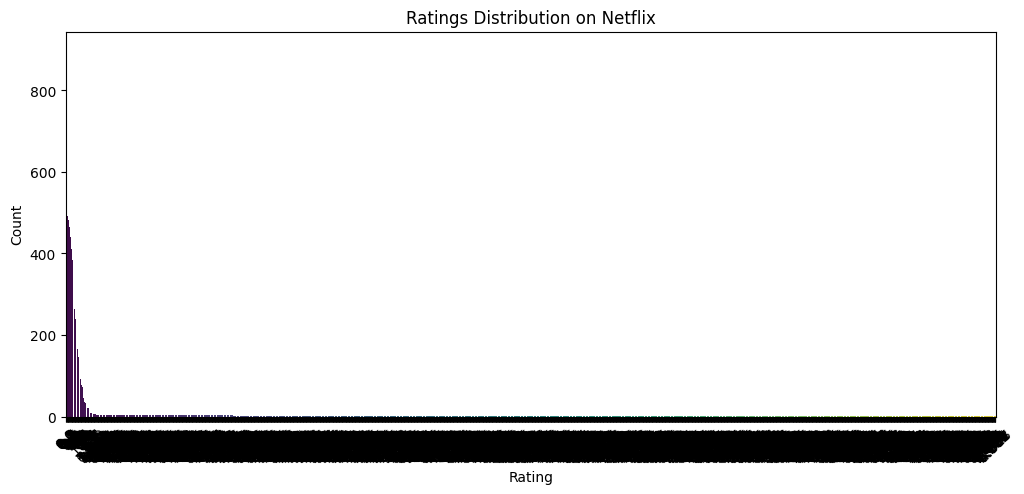

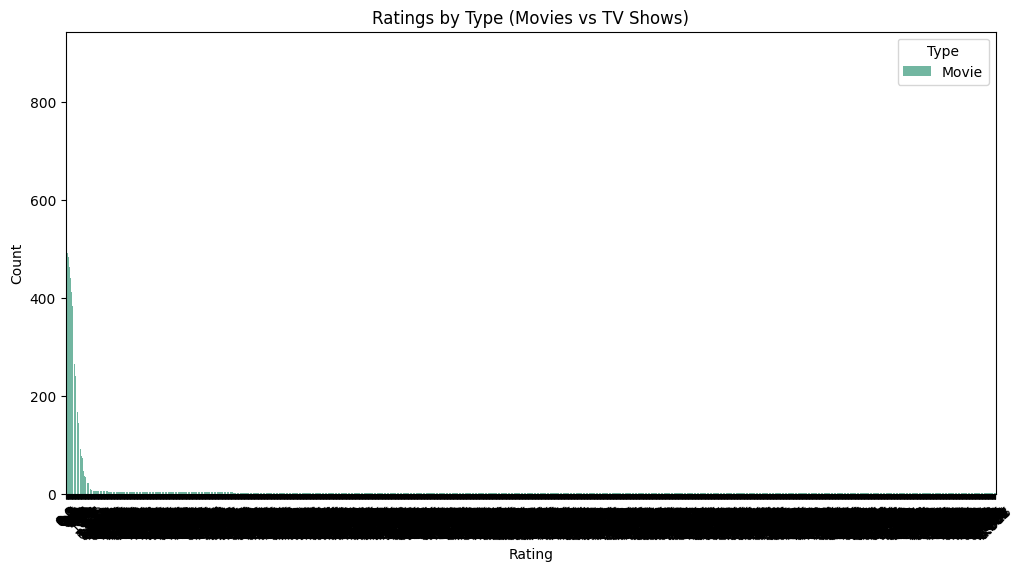

/tmp/ipython-input-3288185358.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating_grouped', data=df,


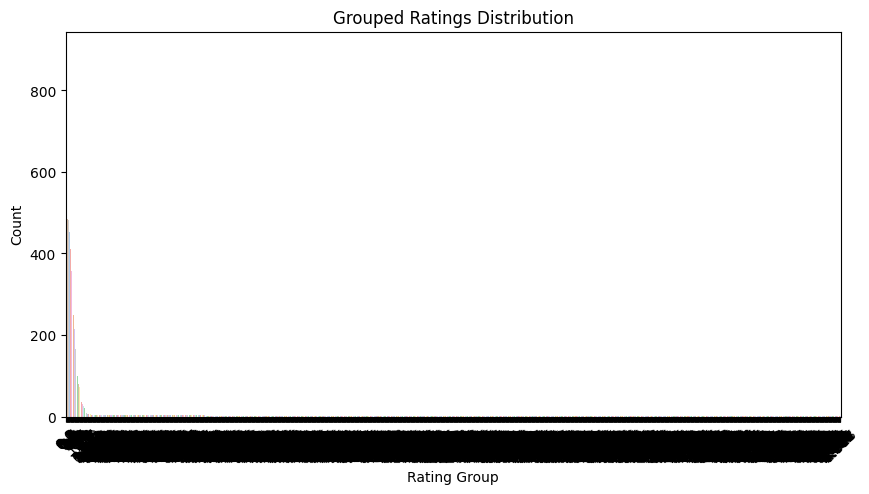

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Make a grouped rating column (safe)
def group_rating(r):
    if pd.isna(r):
        return 'Unknown'
    r = str(r)
    return 'TV Rated' if r.startswith('TV') else r

df['rating_grouped'] = df['rating'].apply(group_rating)

# ---------------------------------------------------
# 1️⃣ Simple Barplot: Ratings Distribution
# ---------------------------------------------------
plt.figure(figsize=(12,5))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='viridis')
plt.title('Ratings Distribution on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# ---------------------------------------------------
# 2️⃣ Ratings Distribution by Type (Movie vs TV Show)
# ---------------------------------------------------
plt.figure(figsize=(12,6))
sns.countplot(x='rating', hue='type', data=df,
              order=df['rating'].value_counts().index,
              palette='Set2')
plt.title('Ratings by Type (Movies vs TV Shows)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()


# ---------------------------------------------------
# 3️⃣ Grouped Rating Barplot (TV vs non-TV)
# ---------------------------------------------------
plt.figure(figsize=(10,5))
sns.countplot(x='rating_grouped', data=df,
              order=df['rating_grouped'].value_counts().index,
              palette='pastel')
plt.title('Grouped Ratings Distribution')
plt.xlabel('Rating Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



Popularity, Votes, and Revenue

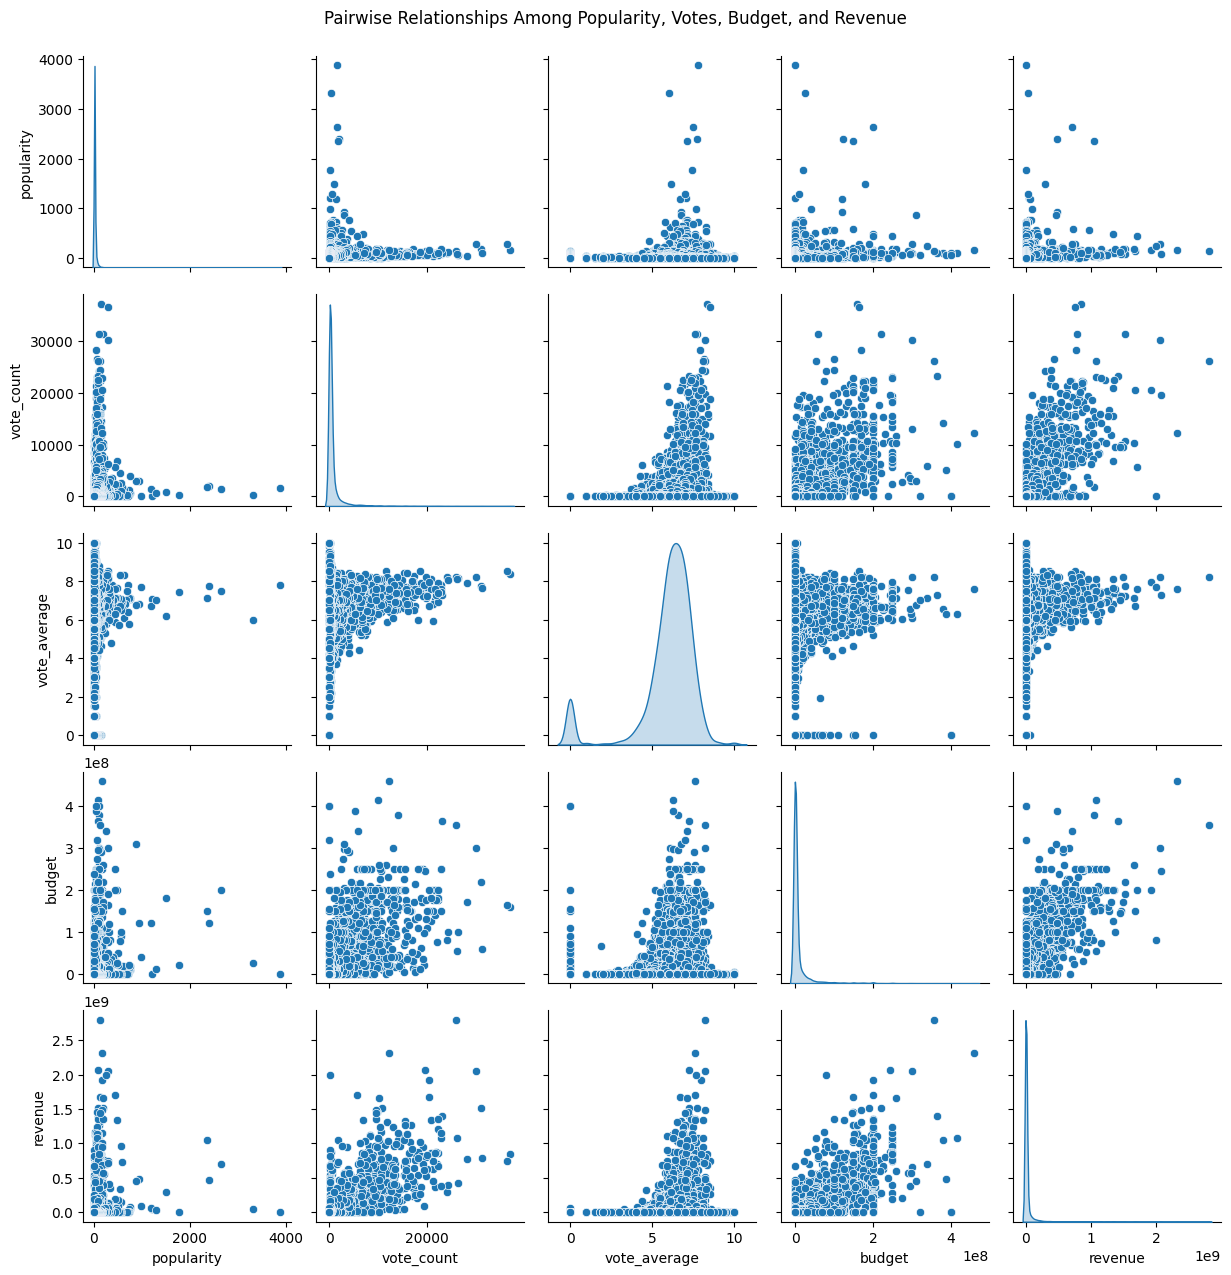

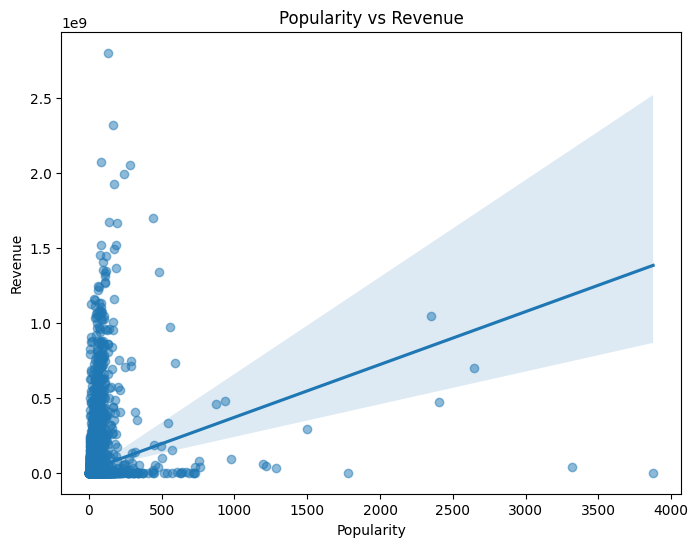

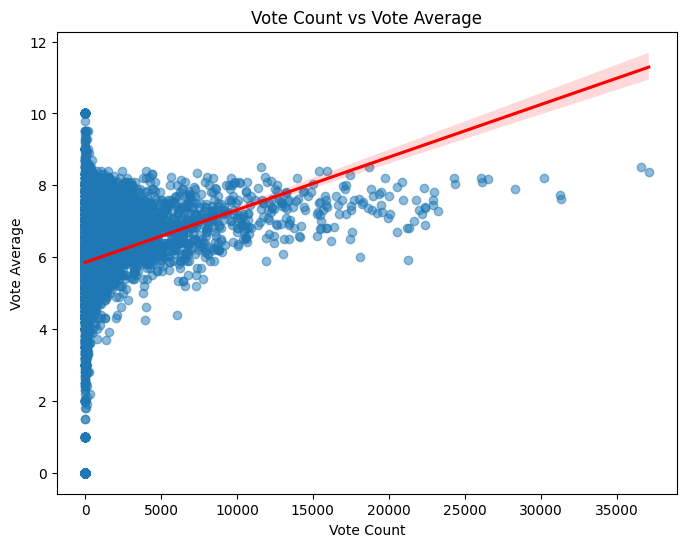

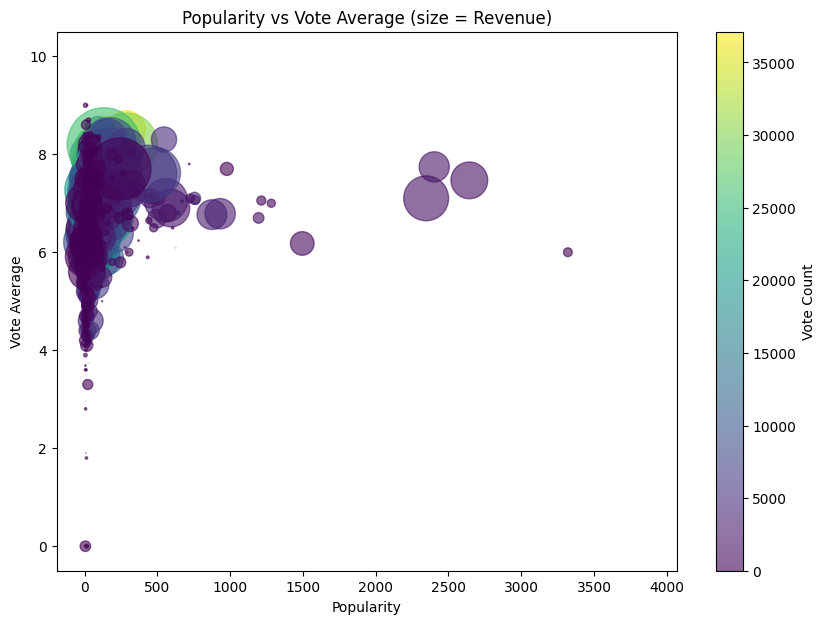

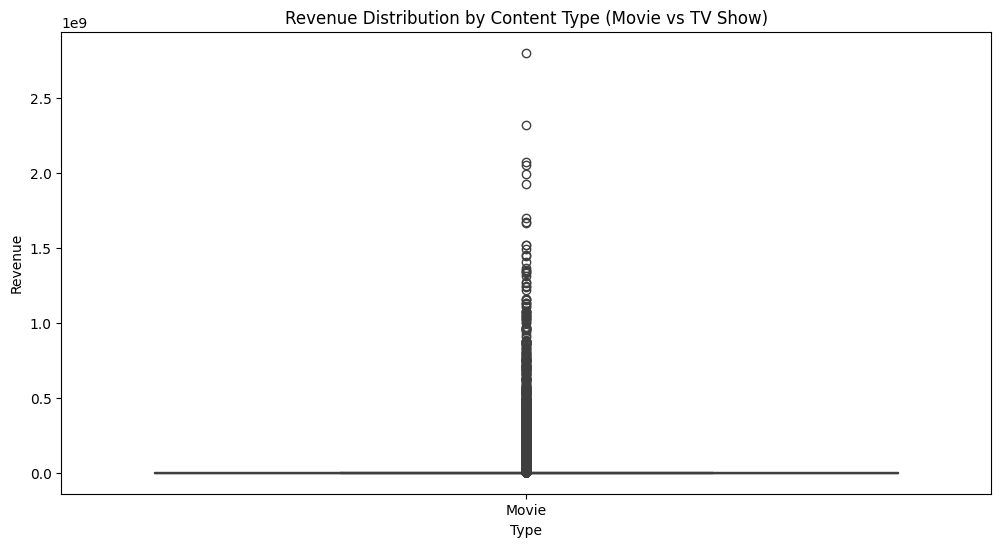

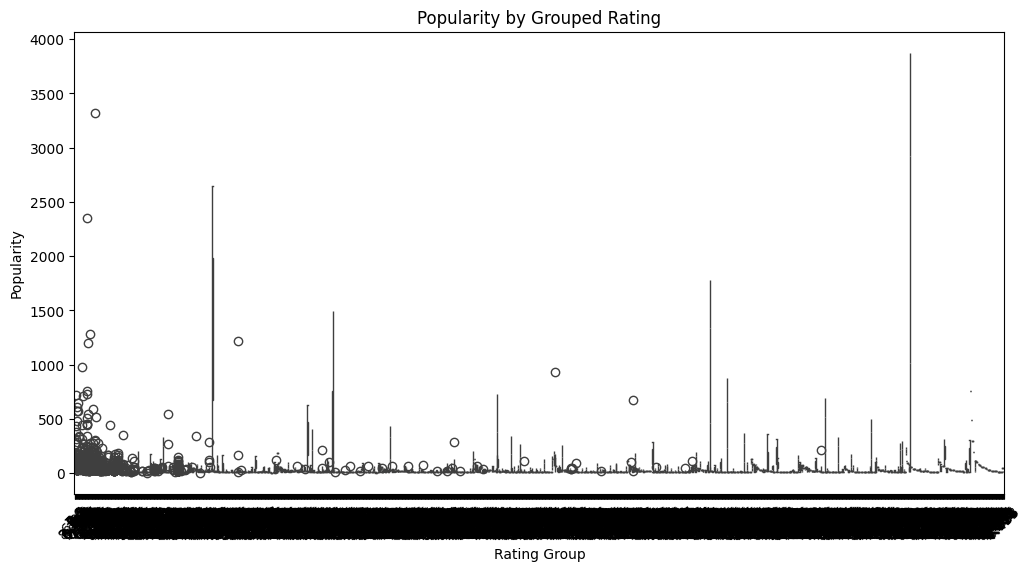

In [21]:
# Create a grouped version of the rating column
df['rating_grouped'] = df['rating'].astype(str)

# Clean weird/missing ratings
df['rating_grouped'] = df['rating_grouped'].replace({
    'nan': 'Unknown',
    'NR': 'Not Rated',
    'UR': 'Unrated'
}).fillna('Unknown')

# Optional: group similar ones
age_map = {
    'G': 'Kids & Family',
    'TV-G': 'Kids & Family',
    'PG': 'Teens & Family',
    'TV-PG': 'Teens & Family',
    'PG-13': 'Teens & Adults',
    'TV-14': 'Teens & Adults',
    'R': 'Adults Only',
    'NC-17': 'Adults Only',
    'TV-MA': 'Adults Only'
}

df['rating_grouped'] = df['rating_grouped'].map(age_map).fillna(df['rating_grouped'])
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['popularity', 'vote_count', 'vote_average', 'budget', 'revenue']

# ---------- 1️⃣ Pairplot of Numeric Columns ----------
sns.pairplot(df[numeric_cols], diag_kind='kde')
plt.suptitle('Pairwise Relationships Among Popularity, Votes, Budget, and Revenue', y=1.02)
plt.show()

# ---------- 2️⃣ Scatter Plot with Regression: Popularity vs Revenue ----------
plt.figure(figsize=(8,6))
sns.regplot(x='popularity', y='revenue', data=df, scatter_kws={'alpha':0.5})
plt.title('Popularity vs Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.show()

# ---------- 3️⃣ Scatter Plot with Regression: Vote Count vs Vote Average ----------
plt.figure(figsize=(8,6))
sns.regplot(x='vote_count', y='vote_average', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Vote Count vs Vote Average')
plt.xlabel('Vote Count')
plt.ylabel('Vote Average')
plt.show()

# ---------- 4️⃣ Bubble Plot: Popularity vs Vote Average (size = Revenue, color = Vote Count) ----------
plt.figure(figsize=(10,7))
plt.scatter(
    df['popularity'],
    df['vote_average'],
    s=df['revenue'].fillna(0) / 1e6,  # scale down revenue for point size, fill NaN with 0
    alpha=0.6,
    c=df['vote_count'].fillna(0),     # color by vote_count
    cmap='viridis'
)
plt.colorbar(label='Vote Count')
plt.title('Popularity vs Vote Average (size = Revenue)')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.show()

# ---------- 5️⃣ Boxplot: Revenue by Type ----------
plt.figure(figsize=(12,6))
sns.boxplot(x='type', y='revenue', data=df)
plt.title('Revenue Distribution by Content Type (Movie vs TV Show)')
plt.xlabel('Type')
plt.ylabel('Revenue')
plt.show()

# ---------- 6️⃣ Boxplot: Popularity by Grouped Ratings ----------
plt.figure(figsize=(12,6))
sns.boxplot(x='rating_grouped', y='popularity', data=df)
plt.title('Popularity by Grouped Rating')
plt.xlabel('Rating Group')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()




Multi-Variable Analysis

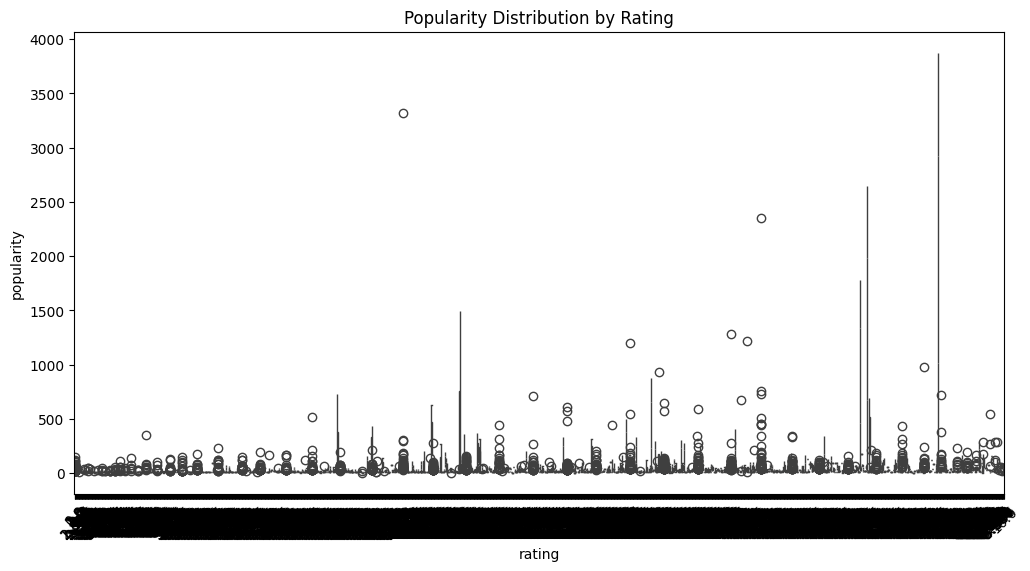

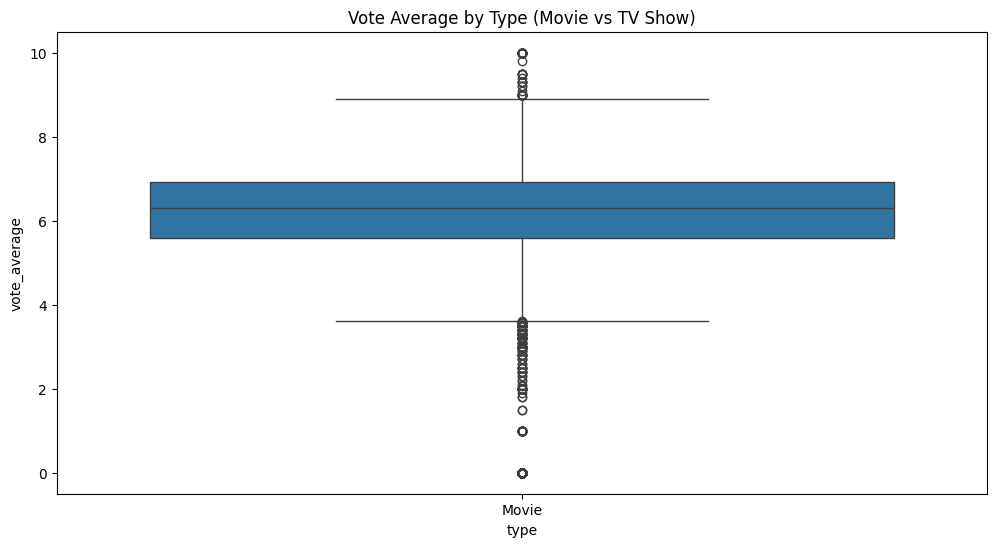

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(x='rating', y='popularity', data=df)
plt.title('Popularity Distribution by Rating')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='type', y='vote_average', data=df)
plt.title('Vote Average by Type (Movie vs TV Show)')
plt.show()





Content Type Analysis




/tmp/ipython-input-4137550770.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set1')


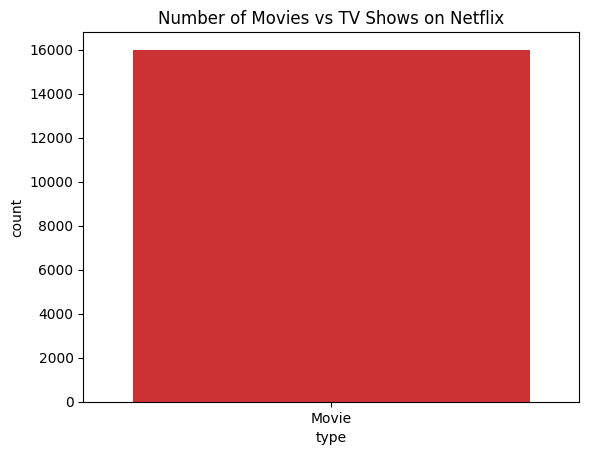

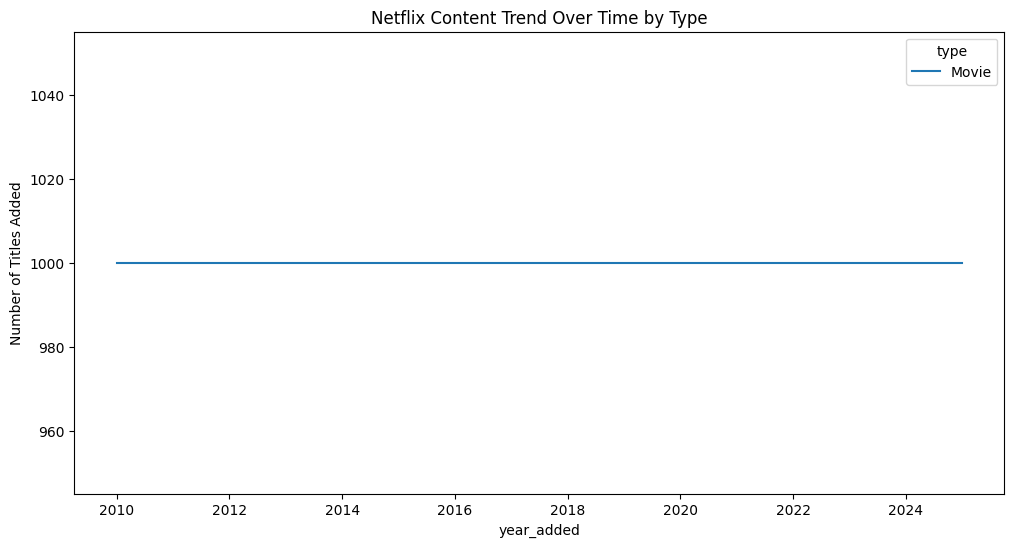

In [23]:
# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year
df['year_added'] = df['date_added'].dt.year
sns.countplot(x='type', data=df, palette='Set1')
plt.title('Number of Movies vs TV Shows on Netflix')
plt.show()

type_year = df.groupby(['year_added', 'type']).size().unstack()
type_year.plot(kind='line', figsize=(12,6))
plt.title('Netflix Content Trend Over Time by Type')
plt.ylabel('Number of Titles Added')
plt.show()



Country Analysis

/tmp/ipython-input-4253731605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


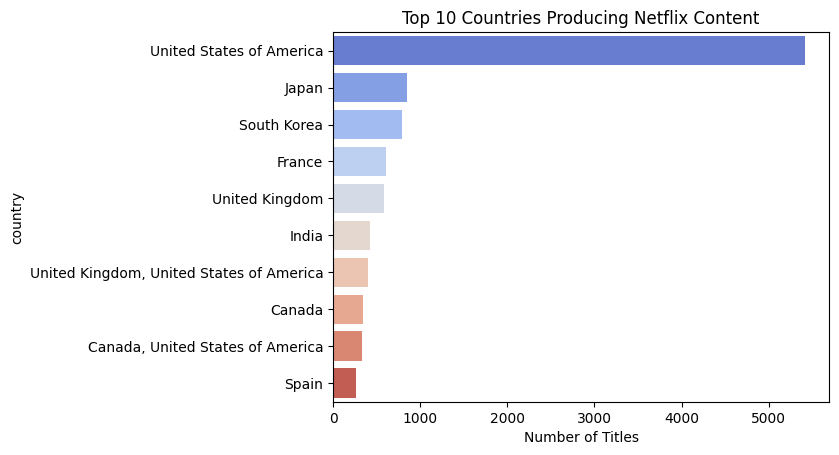

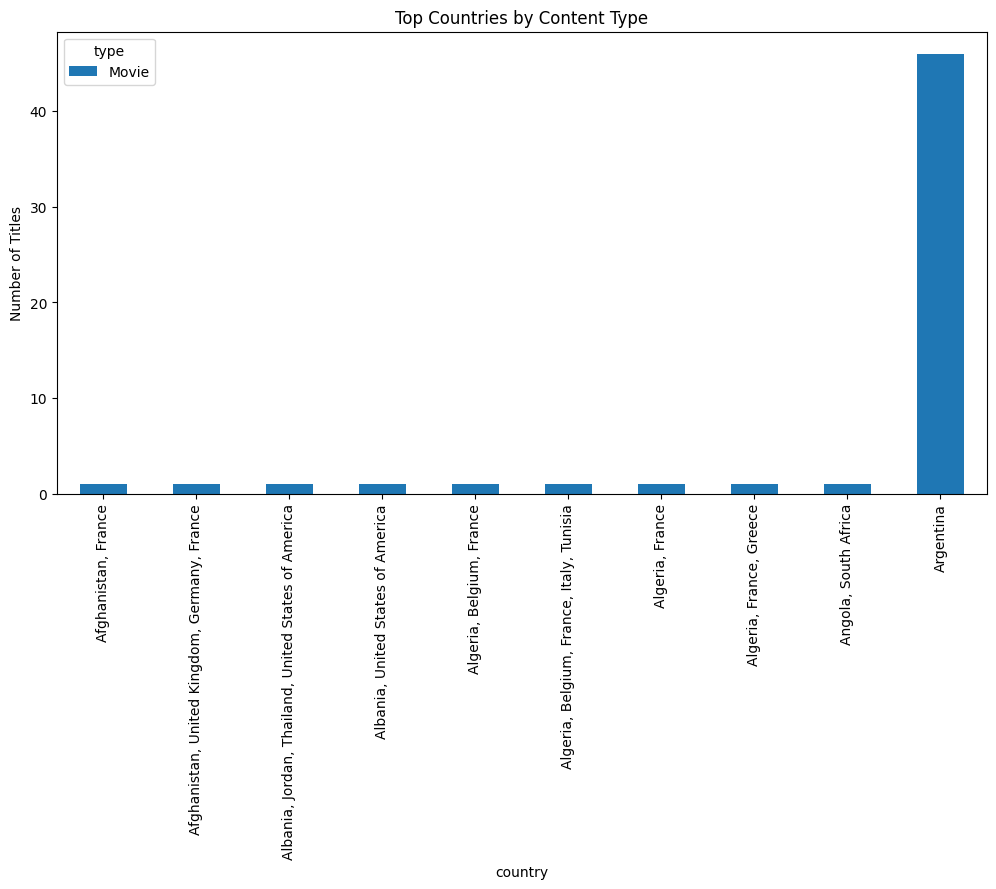

In [24]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.show()
country_type = df.groupby(['country','type']).size().unstack().fillna(0)
country_type.head(10).plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Top Countries by Content Type')
plt.ylabel('Number of Titles')
plt.show()


Genre Analysis

/tmp/ipython-input-4244159888.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')


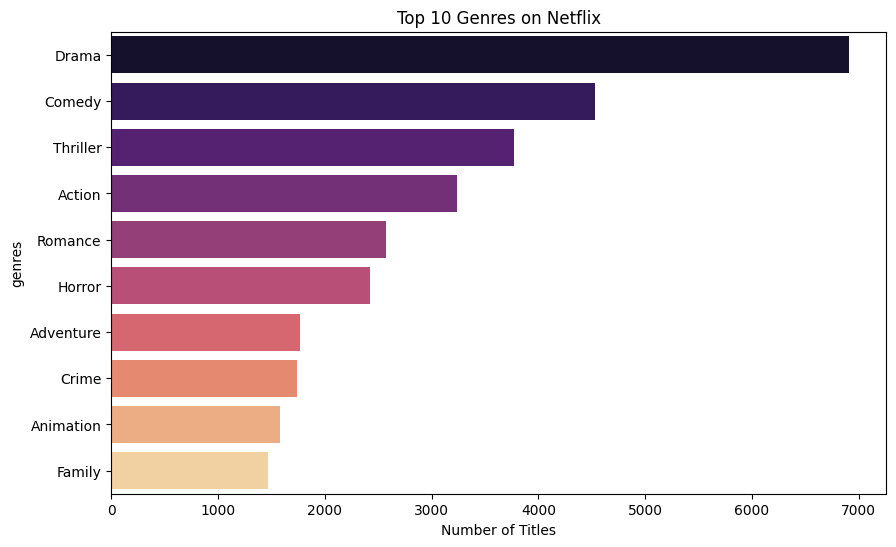

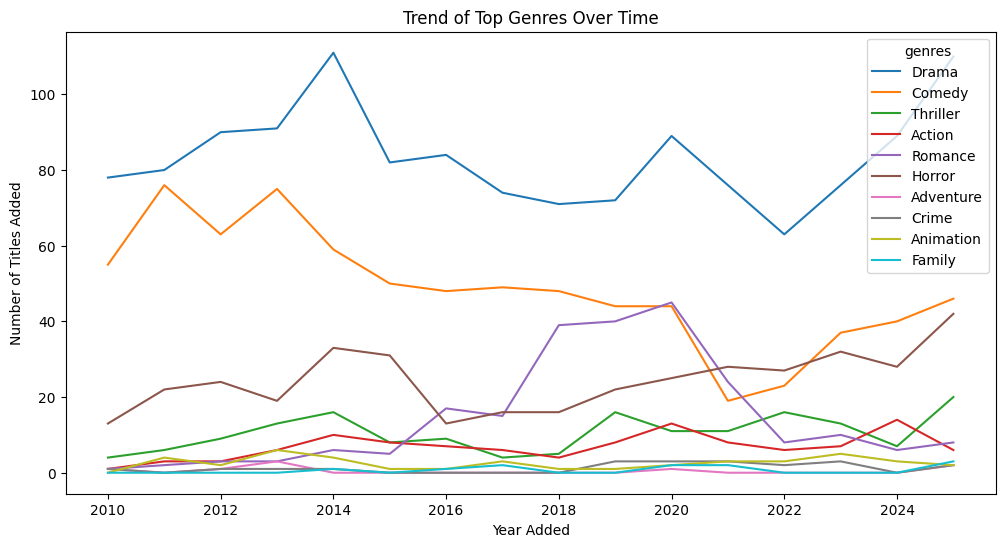

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- Top Genres Overall ----------
genre_series = df['genres'].dropna().str.split(',').explode().str.strip()  # strip spaces
top_genres = genre_series.value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.show()

# ---------- Trend of Top Genres Over Time ----------
genre_year = df.dropna(subset=['genres']).copy()
genre_year = genre_year.explode('genres')
genre_year['genres'] = genre_year['genres'].str.strip()  # strip spaces
genre_year = genre_year.groupby(['year_added','genres']).size().unstack().fillna(0)

# Only plot top genres
genre_year[top_genres.index].plot(figsize=(12,6))
plt.title('Trend of Top Genres Over Time')
plt.ylabel('Number of Titles Added')
plt.xlabel('Year Added')
plt.show()



Language Analysis

/tmp/ipython-input-2300815293.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_languages.values, y=top_languages.index, palette='Set3')


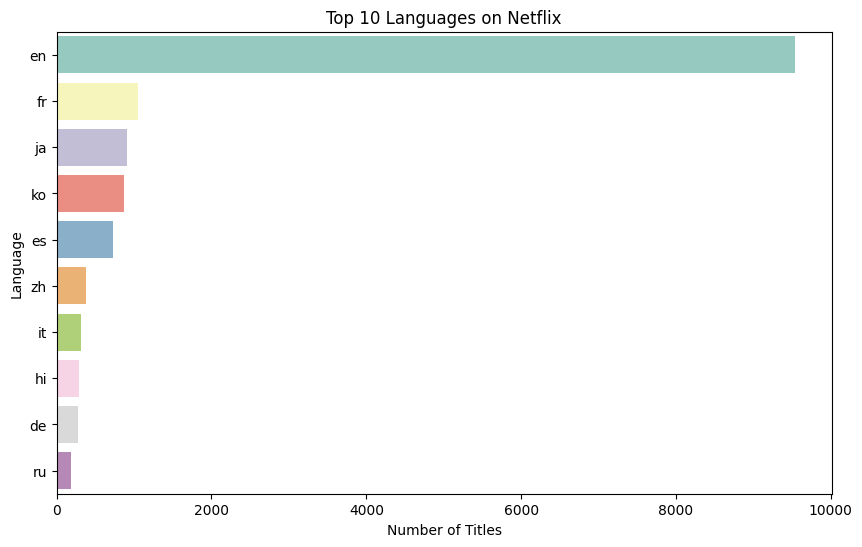

In [26]:
top_languages = df['language'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_languages.values, y=top_languages.index, palette='Set3')
plt.title('Top 10 Languages on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Language')
plt.show()



Correlation analysis



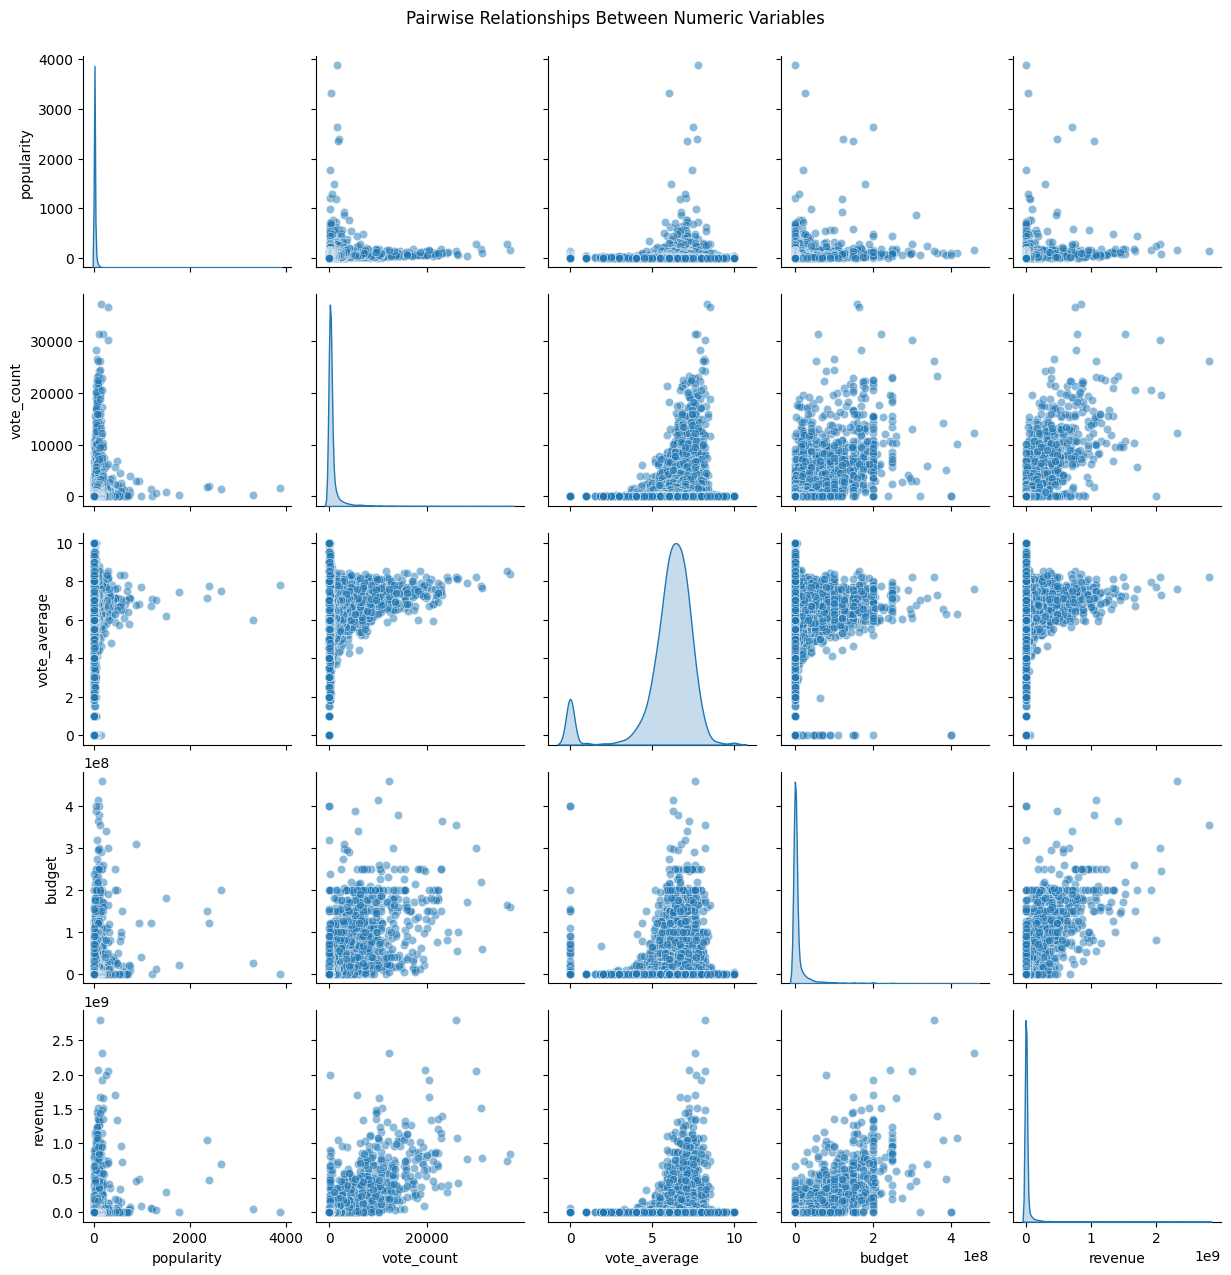

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['popularity', 'vote_count', 'vote_average', 'budget', 'revenue']

sns.pairplot(df[numeric_cols], kind='scatter', diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairwise Relationships Between Numeric Variables', y=1.02)
plt.show()




# Insights:
After exploring the data, some clear patterns emerged. Most content comes from a few countries, with the United States producing the most titles. Drama, Comedy, and Thriller are the most common genres. Ratings and vote counts vary a lot, showing differences in audience interest. Missing information appears mainly in the cast and director columns. These findings give a good overview of the dataset and help guide further analysis or decisions.

# Data cleaning

Remove useless columns and duplicates.


In [28]:
# -----------------------------
# Remove duplicates safely
# -----------------------------
list_columns = []

for col in df.columns:
    series = df[col]
    # Convert Categorical to object temporarily
    if str(series.dtype) == 'category':
        series = series.astype('object')
    # Check if any value is a list
    if series.apply(lambda x: isinstance(x, list)).any():
        list_columns.append(col)

print("Columns containing lists (excluded from duplicate check):", list_columns)

# Only use hashable columns for duplicates
hashable_cols = [col for col in df.columns if col not in list_columns]
df = df.drop_duplicates(subset=hashable_cols)

# Reset index
df = df.reset_index(drop=True)

# Quick check
print("Shape after cleaning:", df.shape)
print("Any duplicates left?", df.drop(columns=list_columns).duplicated().sum())



Columns containing lists (excluded from duplicate check): []
Shape after cleaning: (16000, 20)
Any duplicates left? 0


Handle Missing Values

In [29]:
# Check missing values
missing_counts = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
print("Missing values per column:\n", missing_counts)
print("\nPercentage of missing values:\n", missing_percent)

# Fill missing values
numeric_cols = ['popularity', 'vote_count', 'vote_average', 'budget', 'revenue', 'release_year']
categorical_cols = ['type', 'rating', 'rating_grouped', 'country', 'language', 'genres']

for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')



Missing values per column:
 show_id               0
type                  0
title                 0
director            132
cast                204
country             466
date_added            0
release_year          0
rating                0
duration          16000
genres              107
language              0
description         132
popularity            0
vote_count            0
vote_average          0
budget                0
revenue               0
year_added            0
rating_grouped        0
dtype: int64

Percentage of missing values:
 show_id             0.00000
type                0.00000
title               0.00000
director            0.82500
cast                1.27500
country             2.91250
date_added          0.00000
release_year        0.00000
rating              0.00000
duration          100.00000
genres              0.66875
language            0.00000
description         0.82500
popularity          0.00000
vote_count          0.00000
vote_average        0.00000

Convert Dates & Extract Year Added


In [30]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year



Standardize Duration

In [31]:
# Convert duration column to string first (safe for NaN)
df['duration_str'] = df['duration'].astype(str)

# Extract numeric values for movies/TV
df['duration_num'] = df['duration_str'].str.extract(r'(\d+)').astype(float)

# For TV shows, create a 'seasons' column if "Season" in original duration
df['seasons'] = df.apply(lambda x: float(x['duration_num']) if 'Season' in str(x['duration']) else 0, axis=1)

# Optional: drop temporary column
df = df.drop(columns=['duration_str'])

# Quick check
df[['duration', 'duration_num', 'seasons']].head(10)



,duration,duration_num,seasons
0,NaN,NaN,0
1,NaN,NaN,0
2,NaN,NaN,0
3,NaN,NaN,0
4,NaN,NaN,0
5,NaN,NaN,0
6,NaN,NaN,0
7,NaN,NaN,0
8,NaN,NaN,0
9,NaN,NaN,0


Clean & Split Genres

In [32]:
# Convert genres string to a list and strip spaces
df['genres_list'] = df['genres'].dropna().str.split(',').apply(lambda x: [g.strip() for g in x])


Convert Other Categorical Columns

In [33]:
categorical_prep = ['type', 'rating_grouped', 'country', 'language']
for col in categorical_prep:
    if col in df.columns:
        df[col] = df[col].astype('category')



Final Check

In [34]:
print("\nShape after cleaning:", df.shape)
print("Columns now:", df.columns.tolist())

# Check duplicates, ignoring 'genres_list' (unhashable type)
print("Any duplicates left?", df.drop(columns=['genres_list']).duplicated().sum())




Shape after cleaning: (16000, 23)
Columns now: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'genres', 'language', 'description', 'popularity', 'vote_count', 'vote_average', 'budget', 'revenue', 'year_added', 'rating_grouped', 'duration_num', 'seasons', 'genres_list']
Any duplicates left? 0


Show descriptive statistics

In [35]:
# =========================
# Descriptive Statistics for Cleaned Data
# =========================

import pandas as pd

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Identify columns that contain lists
list_cols = []
for col in categorical_cols:
    temp = df[col].astype(object)  # avoid Categorical dtype issues
    if temp.apply(lambda x: isinstance(x, list)).any():
        list_cols.append(col)

# Columns safe for categorical analysis (exclude list columns)
categorical_cols_clean = [col for col in categorical_cols if col not in list_cols]

print("===== Numeric Columns Summary =====\n")
print(df[numeric_cols].describe())

print("\n===== Categorical Columns Summary =====\n")
for col in categorical_cols_clean:
    print(f"Column: {col}")
    print("Number of unique values:", df[col].nunique())
    print("Top 5 most frequent values:")
    print(df[col].value_counts(dropna=False).head(5))
    print("-"*40)

print("\n===== List Columns Summary (like genres_list) =====\n")
for col in list_cols:
    # Flatten all lists into a single series
    all_items = df[col].dropna().explode()
    print(f"Column: {col}")
    print("Number of unique items:", all_items.nunique())
    print("Top 5 most frequent items:")
    print(all_items.value_counts().head(5))
    print("-"*40)


===== Numeric Columns Summary =====

            show_id  release_year        rating  duration    popularity  \
count  1.600000e+04  16000.000000  16000.000000       0.0  16000.000000   
mean   5.266582e+05   2017.500000      5.956368       NaN     20.384728   
std    3.794427e+05      4.609916      1.754741       NaN     68.610033   
min    1.890000e+02   2010.000000      0.000000       NaN      3.860000   
25%    2.257258e+05   2013.750000      5.600000       NaN      7.840750   
50%    4.468170e+05   2017.500000      6.300000       NaN     10.913500   
75%    7.739808e+05   2021.250000      6.923000       NaN     17.336500   
max    1.440471e+06   2025.000000     10.000000       NaN   3876.006000   

         vote_count  vote_average        budget       revenue  duration_num  \
count  16000.000000  16000.000000  1.600000e+04  1.600000e+04           0.0   
mean     718.656125      5.956368  8.766792e+06  2.446308e+07           NaN   
std     2080.198316      1.754741  2.912450e+07  1

After cleaning: Check the shape of the dataset, Check the columns and their types, Check for missing values, Check duplicates, Quick descriptive statistics, Preview the dataset

In [36]:
# -----------------------------
# 1️⃣ Remove duplicates safely (fix for categorical columns)
# -----------------------------

list_columns = []

for col in df.columns:
    # Temporarily convert to object if categorical
    series = df[col]
    if series.dtype.name == 'category':
        series = series.astype('object')

    # Check if any value is a list
    if series.apply(lambda x: isinstance(x, list)).any():
        list_columns.append(col)

print("Columns containing lists (excluded from duplicate check):", list_columns)

# Only use hashable columns for duplicates
hashable_cols = [col for col in df.columns if col not in list_columns]

df = df.drop_duplicates(subset=hashable_cols)
print("Shape after removing duplicates:", df.shape)





Columns containing lists (excluded from duplicate check): ['genres_list']
Shape after removing duplicates: (16000, 23)


In [37]:
import pandas as pd
import numpy as np

# ----------------------------------------------------
# 1️⃣ Load Data
# ----------------------------------------------------
df = pd.read_csv("netflix_movies_detailed_up_to_2025.csv")

print("Initial shape:", df.shape)
print("Initial columns:", df.columns.tolist())
print("\n")


# ----------------------------------------------------
# 2️⃣ Basic Cleaning: strip column names, handle objects
# ----------------------------------------------------
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert empty strings to NaN
df.replace("", np.nan, inplace=True)


# ----------------------------------------------------
# 3️⃣ Identify list-like columns and convert safely
# ----------------------------------------------------
list_columns = []

for col in df.columns:
    # If ANY row contains a list → treat the whole column as list-like
    if df[col].apply(lambda x: isinstance(x, list)).any():
        list_columns.append(col)

print("List columns detected:", list_columns)

# Convert list columns to strings for safety
for col in list_columns:
    df[col] = df[col].apply(lambda x: ",".join(x) if isinstance(x, list) else x)


# ----------------------------------------------------
# 4️⃣ Handle missing values (numeric + categorical)
# ----------------------------------------------------
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill numeric
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical
df[categorical_cols] = df[categorical_cols].fillna("Unknown")


# ----------------------------------------------------
# 5️⃣ Safe Duplicate Removal
# (after converting list columns to strings)
# ----------------------------------------------------
duplicate_count = df.duplicated().sum()
print("Duplicate rows found:", duplicate_count)

df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)
print("\n")


# ----------------------------------------------------
# 6️⃣ Create df_clean for modeling
# ----------------------------------------------------
df_clean = df.copy()
print("df_clean READY with shape:", df_clean.shape)
print("\n")


# ----------------------------------------------------
# 7️⃣ Diagnostics: Missing, stats, preview
# ----------------------------------------------------
print("Missing Values:\n")
missing_df = pd.DataFrame({
    "Missing Count": df_clean.isnull().sum(),
    "Missing %": (df_clean.isnull().mean()*100).round(2)
})
print(missing_df)
print("\n")

print("Numeric Summary:\n")
print(df_clean.describe())
print("\n")

print("Categorical Summary:\n")
print(df_clean.describe(include="object"))
print("\n")

print("Data Preview:\n")
print(df_clean.head())


Initial shape: (16000, 18)
Initial columns: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'genres', 'language', 'description', 'popularity', 'vote_count', 'vote_average', 'budget', 'revenue']


List columns detected: []
Duplicate rows found: 0
Shape after removing duplicates: (16000, 18)


df_clean READY with shape: (16000, 18)


Missing Values:

              Missing Count  Missing %
show_id                   0        0.0
type                      0        0.0
title                     0        0.0
director                  0        0.0
cast                      0        0.0
country                   0        0.0
date_added                0        0.0
release_year              0        0.0
rating                    0        0.0
duration              16000      100.0
genres                    0        0.0
language                  0        0.0
description               0        0.0
popularity                0        0.0


# Insights:

After cleaning the data, the dataset is now more consistent and easier to work with. Duplicate rows and unnecessary columns have been removed, missing values have been filled, and numeric and categorical columns are ready for analysis. List-like columns, such as genres, have been standardized, and all key columns have consistent formats. This makes the data reliable for deeper analysis and modeling.

# Data Modeling

# Model 1: Regression Classification Model for Predicting Netflix “Hit” Titles

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipython-input-1482228773.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Accuracy: 0.631875

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.65      0.64      1643
           1       0.62      0.62      0.62      1557

    accuracy                           0.63      3200
   macro avg       0.63      0.63      0.63      3200
weighted avg       0.63      0.63      0.63      3200



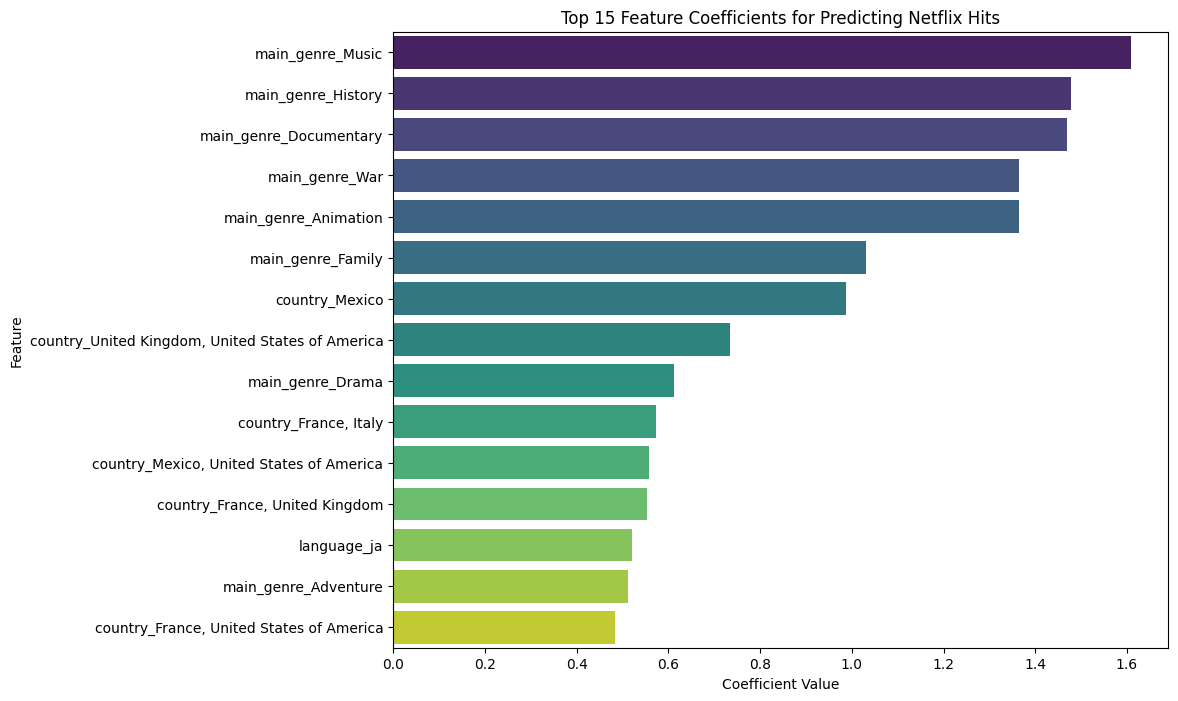

In [38]:
# -----------------------------
# Netflix Hit Prediction
# -----------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Use cleaned dataframe
# -----------------------------
df_model = df_clean.copy()

# -----------------------------
# Standardize duration & seasons
# -----------------------------
df_model['duration'] = df_model['duration'].astype(str)

df_model['duration_num'] = pd.to_numeric(
    df_model['duration'].str.extract(r'(\d+)')[0],
    errors='coerce'
)

def get_seasons(val):
    if isinstance(val, str) and "Season" in val:
        nums = [int(s) for s in val.split() if s.isdigit()]
        return nums[0] if nums else 0
    return 0

df_model['seasons'] = df_model['duration'].apply(get_seasons)

# -----------------------------
# Extract MAIN GENRE
# -----------------------------
df_model['genres'] = df_model['genres'].astype(str)

df_model['main_genre'] = df_model['genres'].apply(
    lambda x: x.split(',')[0].strip() if ',' in x else x
)

df_model['main_genre'] = df_model['main_genre'].replace("nan", "Unknown")
df_model['main_genre'] = df_model['main_genre'].fillna("Unknown")

# -----------------------------
# Create target variable
# -----------------------------
df_model['is_hit'] = (
    df_model['vote_average'] > df_model['vote_average'].median()
).astype(int)

# -----------------------------
# Select features
# -----------------------------
feature_cols = [
    'type', 'main_genre', 'language', 'country',
    'duration_num', 'seasons', 'release_year'
]

X = df_model[feature_cols].copy()
y = df_model['is_hit']

# -----------------------------
# FIX: Impute missing BEFORE encoding
# -----------------------------
# Fill categorical missing with "Unknown"
for col in ['type', 'main_genre', 'language', 'country']:
    X[col] = X[col].fillna("Unknown")

# Fill numeric missing with median
for col in ['duration_num', 'seasons', 'release_year']:
    X[col] = X[col].fillna(X[col].median())

# -----------------------------
# One-hot encode
# -----------------------------
X_encoded = pd.get_dummies(
    X,
    columns=['type', 'main_genre', 'language', 'country'],
    drop_first=True
)

# Double-check no NaNs remain
X_encoded = X_encoded.fillna(0)

# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Train Logistic Regression
# -----------------------------
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# -----------------------------
# Evaluate model
# -----------------------------
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -----------------------------
# Feature Importance
# -----------------------------
coef_df = pd.DataFrame({
    'feature': X_encoded.columns,
    'coefficient': model.coef_[0]
}).sort_values(by='coefficient', ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(
    x='coefficient',
    y='feature',
    data=coef_df.head(15),
    palette='viridis'
)
plt.title('Top 15 Feature Coefficients for Predicting Netflix Hits')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()



Insight: Our simple logistic regression model predicts whether a Netflix title is likely to be a hit based on attributes like type, genre, language, duration, and release year. The model achieved 63% accuracy, which is better than random guessing/50% but not perfect. This reflects that a show’s success depends on many factors beyond these basic features, such as marketing, star power, or trending topics. Despite the modest accuracy, the model provides useful insights: for example, certain genres, content types, or longer-running TV shows are more likely to be hits. It serves as a starting point for understanding patterns in Netflix content, and with more data and advanced modeling, predictions could be significantly improved.

# Model 2: Netflix Revenue Prediction Model

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# -----------------------------
# 1️⃣ Define features and target
# -----------------------------
numeric_features = ['release_year', 'popularity', 'vote_count', 'vote_average', 'budget']
categorical_features = ['type', 'rating', 'language']

target = 'revenue'

X = df_clean[numeric_features + categorical_features]
y = df_clean[target]

# -----------------------------
# 2️⃣ Split into train/test
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 3️⃣ Preprocessing
# -----------------------------
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# -----------------------------
# 4️⃣ Pipeline with model
# -----------------------------
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# -----------------------------
# 5️⃣ Train the model
# -----------------------------
model.fit(X_train, y_train)

# -----------------------------
# 6️⃣ Predict & evaluate
# -----------------------------
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2e}")
print(f"R^2 Score: {r2:.3f}")

# -----------------------------
# ✅ Feature importance (numeric only, approximate)
# -----------------------------
# Get numeric feature importances from the random forest
importances = model.named_steps['regressor'].feature_importances_
feature_names = numeric_features + list(model.named_steps['preprocessor']
                                        .named_transformers_['cat']
                                        .get_feature_names_out(categorical_features))

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print("\nFeature Importances:\n", importance_df)



Mean Squared Error: 3.05e+15
R^2 Score: 0.761

Feature Importances:
            feature  importance
4           budget    0.400810
2       vote_count    0.383436
1       popularity    0.072308
0     release_year    0.028621
3     vote_average    0.022797
...            ...         ...
377   rating_5.529    0.000000
381   rating_5.538    0.000000
402    rating_5.59    0.000000
1100  rating_6.673    0.000000
386   rating_5.552    0.000000

[1956 rows x 2 columns]


Insight: The model shows that budget and vote count are the most important factors driving revenue, together accounting for the majority of predictive power. Popularity, release year, and average votes also contribute, but to a lesser extent. Categorical features like type, language, and rating have very low individual importance in predicting revenue. This suggests that investing in higher-budget content and titles that attract more viewer engagement (votes) is likely to yield higher revenue for Netflix, while genre or rating alone has minimal direct impact on revenue.

# Model 3: Clustering to Explore Characteristics of Best Performing Titles